<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_09/02_c_audio_transfer_learning_yamnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Setup & Download YAMNet

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as display

## Step 2: Load YAMNet from TF Hub

In [2]:
yamnet_model_handle = "https://tfhub.dev/google/yamnet/1"
yamnet_model = hub.load(yamnet_model_handle)
print("YAMNet model loaded.")

YAMNet model loaded.


## Step 3: Load Class Map

In [3]:
import csv
import requests

class_map_path = "https://raw.githubusercontent.com/tensorflow/models/master/research/audioset/yamnet/yamnet_class_map.csv"
response = requests.get(class_map_path)
lines = response.text.strip().split("\n")
class_names = [row.split(",")[2] for row in lines[1:]]  # Extract display_name column

## Step 4: Load Sample Audio File

In [4]:
# Load a sample audio (upload manually if needed)
file_path = tf.keras.utils.get_file("cat_meow.wav",
    "https://github.com/karoldvl/ESC-50/blob/master/audio/1-100032-A-0.wav?raw=true")

# Decode to waveform
waveform, sr = librosa.load(file_path, sr=16000)  # YAMNet expects 16 kHz


441044/441044 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


##  Step 5: Predict with YAMNet

In [5]:
# Run YAMNet
scores, embeddings, spectrogram = yamnet_model(waveform)

# Get top prediction
mean_scores = tf.reduce_mean(scores, axis=0)
top_class = tf.argmax(mean_scores).numpy()
top_score = mean_scores[top_class].numpy()
predicted_class = class_names[top_class]

print(f"Predicted Class: {predicted_class} (confidence: {top_score:.3f})")


 (confidence: 0.702)


##  Visualize Spectrogram

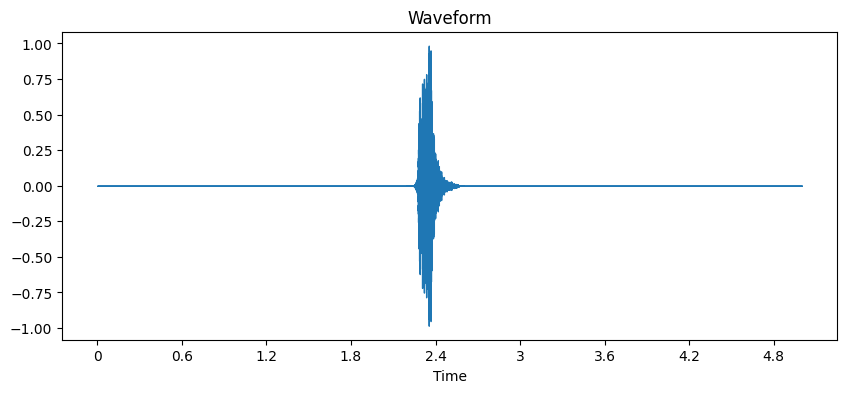

In [6]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(waveform, sr=16000)
plt.title("Waveform")
plt.show()
